In [1]:
#### 1.Loading_data_for_signature_analysis.R
## 1)Loading cluster results
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
table(Cluster.df$dynamicColors)


     blue     brown turquoise    yellow 
      103        47       135         1 

In [3]:
#### 5.Other_Paper_classification_results.R
# Paper: Comparative Molecular Analysis of Gastrointestinal Adenocarcinomas
## 1.Read data
COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Comparative_Molecular_Analysis_of_Gastrointestinal_Adenocarcinomas/COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset.rds")
COAD.GI.Adenocarcinomas.Characteristics <- COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset$COAD.GI.Adenocarcinomas.Characteristics
#colnames(COAD.GI.Adenocarcinomas.Characteristics)
## 2.Merge table
MergeTable.GI.Char <- dplyr::left_join(Cluster.df, COAD.GI.Adenocarcinomas.Characteristics, by = "rownames")

Loading required package: ggplot2


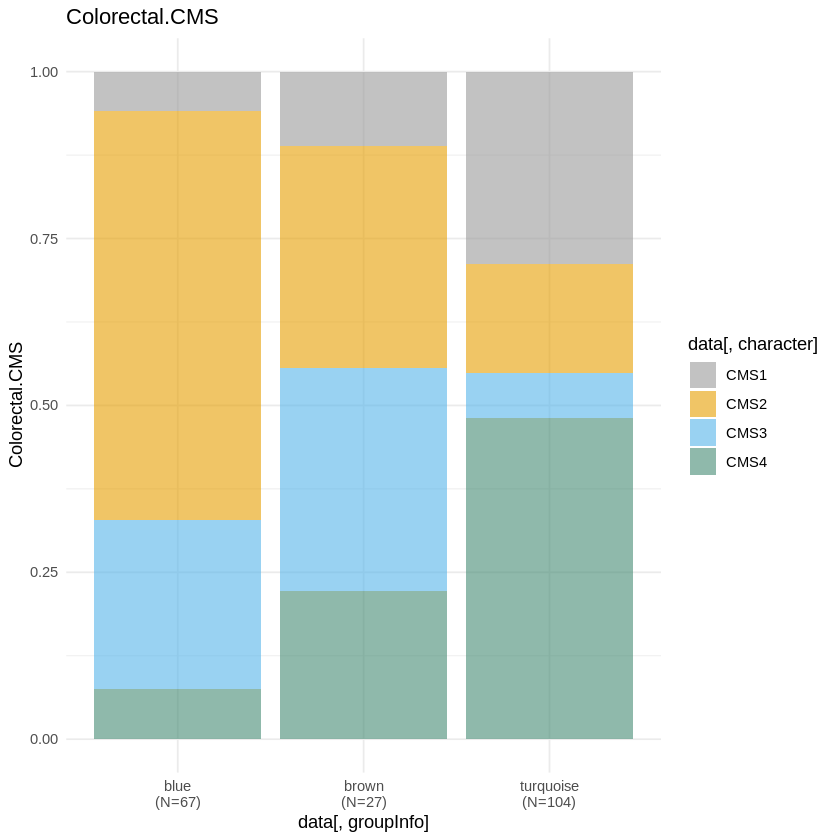

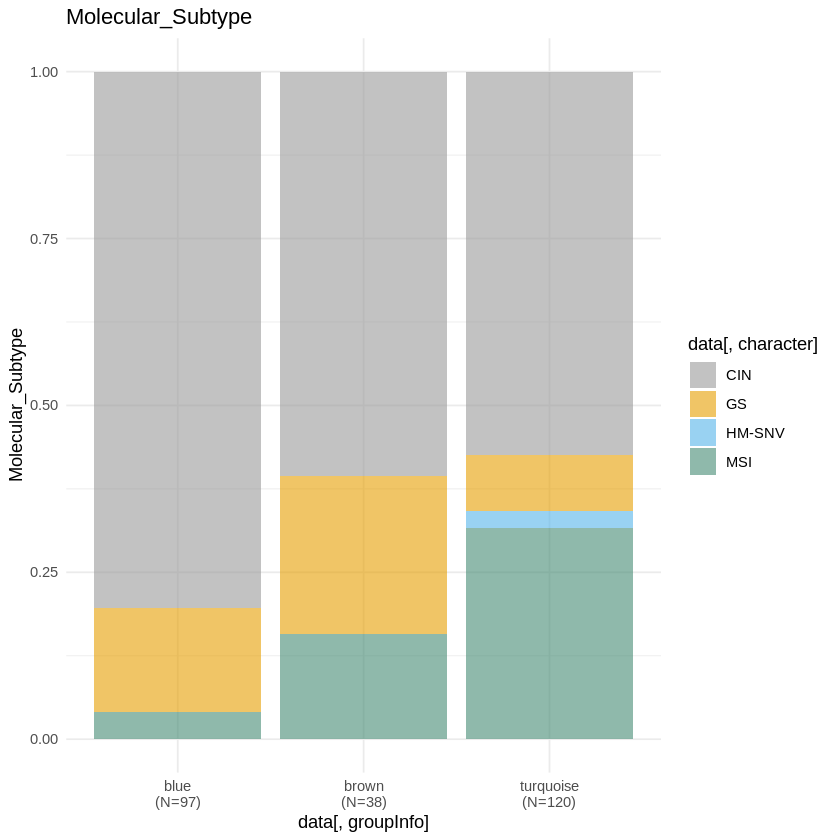

In [4]:
## 3.Ploting
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/ggplot2_JH.R")
## MergeTable.GI.Char ## 
# Paper:The consensus molecular subtypes of colorectal cancer
ggplot2_barPlot_JH(df = MergeTable.GI.Char,groupInfo = "dynamicColors",
                   character = "Colorectal.CMS",
                   values= alpha(c("#999999", "#E69F00", "#56B4E9","#458B74","#8B2323"),0.6)
)
## Molecular_Subtype ##
# Paper:Comparative Molecular Analysis of Gastrointestinal Adenocarcinomas
ggplot2_barPlot_JH(df = MergeTable.GI.Char,groupInfo = "dynamicColors",
                   character = "Molecular_Subtype",
                   values= alpha(c("#999999", "#E69F00", "#56B4E9","#458B74","#8B2323"),0.6)
)